<h2> Nauczanie maszynowe/ƒÜwiczenia10

In [38]:
from IPython import display


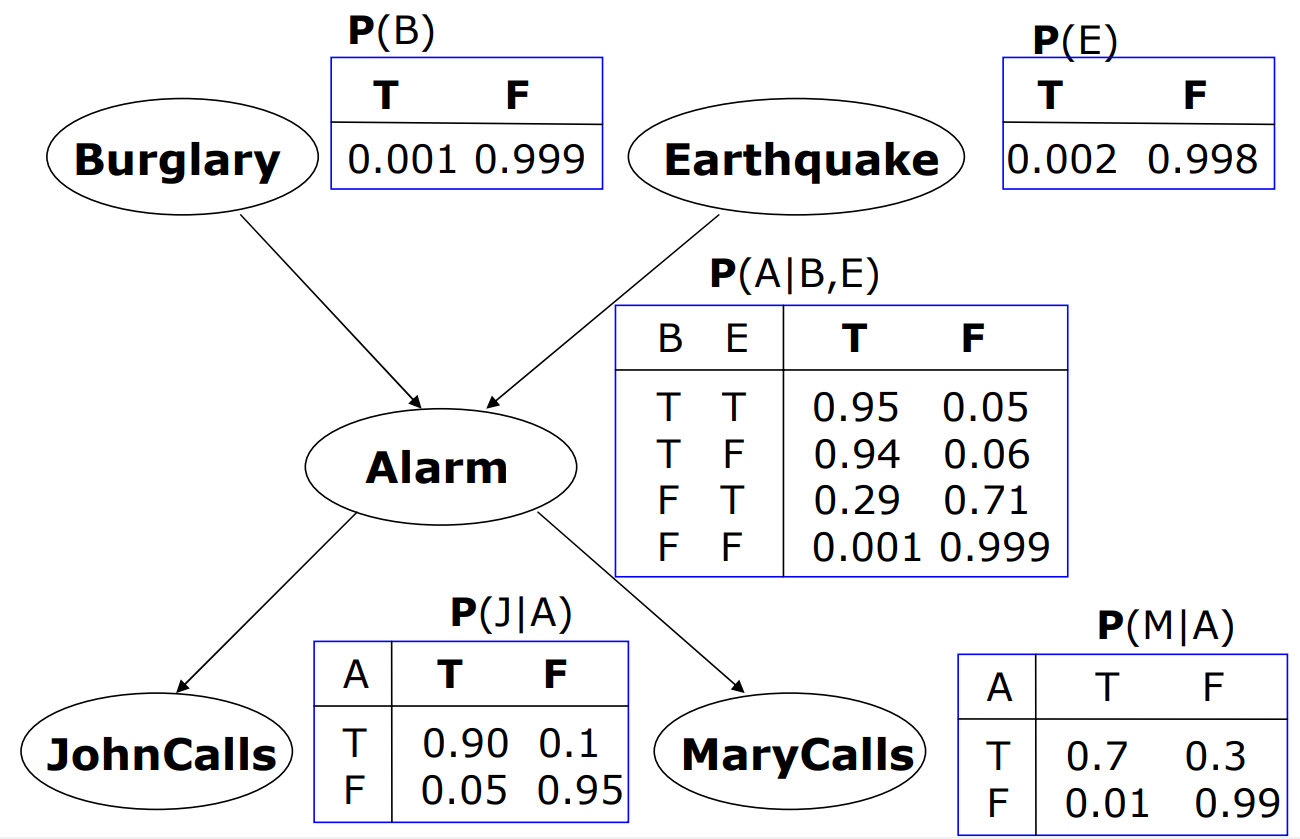v

<h4> Zadanie1: Oblicz $P(B=T, E=T, A=T, J=T, M=F)$



$P(B=T, E=T, A=T, J=T, M=F) = 0.001 * 0.002 * 0.95 * 0.9 * 0.3 = 5.13e-7$

<h4> Zadanie2: (oszƒôdno≈õƒá parametr√≥w):
    
- Ile potrzeba parametr√≥w aby opisaƒá rozk≈Çad ≈ÇƒÖczny 5 zmiennych binarnych? 
- Ile parametr√≥w ma powy≈ºsza sieƒá? 

Aby opisaƒá 5 zmiennych binarnych w rozk≈Çadzie ≈ÇƒÖcznym potrzeba by by≈Ço 32 parametr√≥w (2^5 = 32). U≈ºycie sieci bayesowskiej do przedstawienia relacji miƒôdzy 5 zmiennymi binarnymi umo≈ºliwia u≈ºycie mniejszej liczby parametr√≥w ni≈º pe≈Çny wsp√≥lny rozk≈Çad dla wszystkich mo≈ºliwych kombinacji warto≈õci zmiennych. Powy≈ºsza sieƒá ma: 2 + 2 + 2x2x2 + 2x2 + 2x2 = 20 parametr√≥w.

<h4> Zadanie3: Wykonaj analogiczne zadanie dla 10 zmiennych binarnych i nastƒôpujƒÖcej topologii sieci:

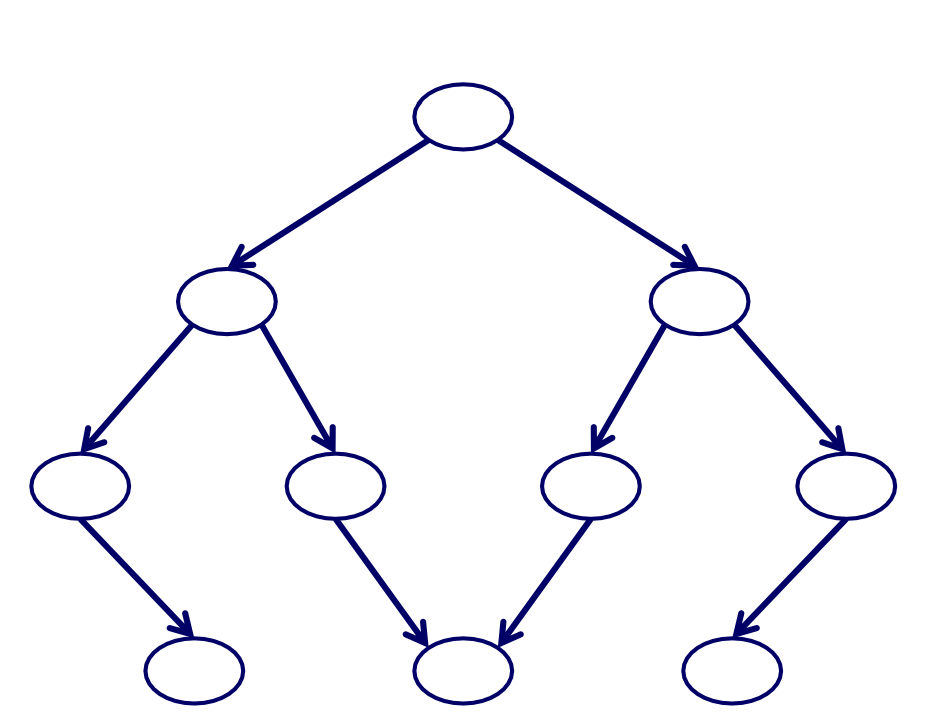

Dla 10 zmiennych binarnych mamy 2^10 = 1024 parametr√≥w w rozk≈Çadzie ≈ÇƒÖcznym. Powy≈ºsza sieƒá ma natomiast 2 + 2x(2x2 + 2x2 + 2x2 + 2x2) + 2x2x2 = 42 parametr√≥w.

A teraz parƒô przyk≈Çad√≥w w Python

In [41]:
import pandas as pd

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

mle_model = MaximumLikelihoodEstimator(nb_net, data) #szacowanie prawdopodobienstw za pomocƒÖ metody najwiƒôkszej wiarygodnosci
print(mle_model.estimate_cpd('fruit'))  
print(mle_model.estimate_cpd('size')) 
print(mle_model.estimate_cpd('tasty'))  

+---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| fruit(banana) | 0.5 |
+---------------+-----+
+-------------+----------+
| size(large) | 0.714286 |
+-------------+----------+
| size(small) | 0.285714 |
+-------------+----------+
+------------+--------------+--------------------+---------------------+---------------+
| fruit      | fruit(apple) | fruit(apple)       | fruit(banana)       | fruit(banana) |
+------------+--------------+--------------------+---------------------+---------------+
| size       | size(large)  | size(small)        | size(large)         | size(small)   |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(no)  | 0.25         | 0.3333333333333333 | 0.16666666666666666 | 1.0           |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(yes) | 0.75         | 0.6666666666666666 | 0.8333333333333334  | 0.0           |
+------------+--------------+----

In [ ]:
from pgmpy.estimators import BayesianEstimator

est = BayesianEstimator(nb_net, data)
print(est.estimate_cpd('tasty', prior_type='K2')) #dodaje pseudozliczenia (1) zeby m.in. wyeliminowac zera

+------------+--------------------+--------------+---------------+--------------------+
| fruit      | fruit(apple)       | fruit(apple) | fruit(banana) | fruit(banana)      |
+------------+--------------------+--------------+---------------+--------------------+
| size       | size(large)        | size(small)  | size(large)   | size(small)        |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(no)  | 0.3333333333333333 | 0.4          | 0.25          | 0.6666666666666666 |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(yes) | 0.6666666666666666 | 0.6          | 0.75          | 0.3333333333333333 |
+------------+--------------------+--------------+---------------+--------------------+


<h4> Zadanie4: Wyja≈õnij warto≈õƒá 0.75 w powy≈ºszej tabeli (poprzez bezpo≈õrednie wyliczenie i obja≈õnienie).

Z powy≈ºych dw√≥ch tabeli, wynika ≈ºe:

1.   w tabeli pierwszej mamy 1/6 niesmacznych du≈ºych banan√≥w i 5/6 smacznych du≈ºych banan√≥w.
2.   nastƒôpnie dodajemy po pseudozliczeniu i wtedy mamy 1/4 niesmacznnych du≈ºych banan√≥w i 3/4 du≈ºych banan√≥w.


Na poczƒÖtku w≈õr√≥d du≈ºych banan√≥w by≈Ço 5 smacznych i 1 niesmaczny, a pseudozliczenie zmieni≈Ço ten stan na 6 smacznych i 2 niesmaczne.

6/8 = 0.75 <- stƒÖd warto≈õƒá w drugiej tabeli.




<h4> Zadanie5: Wygeneruj dane zawierajƒÖce 10 tys wierszy i 3 kolumny. Pierwsze dwie kolumny (A, B) niech zawierajƒÖ losowe liczby ca≈Çkowite z zakresu $<-2,2>$. Trzecia kolumna (C) to kombinacja liniowa dw√≥ch pierwszych kolumn $C = 2A-3C$. Zbuduj dwie topologie sieci, tzn. $(A ->C, B->C)$ oraz $(A->B, B->C)$. Oce≈Ñ kt√≥ra z sieci wydaje sie lepiej odzwierciedlaƒá strukturƒô danych. Wyja≈õnij dlaczego.

In [ ]:
pip install pgmpy

In [11]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BDeuScore, K2Score, BicScore



df = pd.DataFrame(np.random.randint(-2, 3, size=(10000, 2)), columns=["A", "B"])
df["C"] = 2 * df["A"] - 3 * df["B"]


model  = BayesianNetwork([("A", "C"), ("B", "C")])
model2 = BayesianNetwork([('A', 'B'), ('B', 'C')])


model.fit(df, estimator=BayesianEstimator, prior_type="BDeu")
model2.fit(df, estimator=BayesianEstimator, prior_type="BDeu")


bdeu = BDeuScore(df)
k2 = K2Score(df)
bic = BicScore(df)

print("(ùê¥‚àí>ùê∂,ùêµ‚àí>ùê∂)")
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))
print("(ùê¥‚àí>ùêµ,ùêµ‚àí>ùê∂)")
print(bdeu.score(model2))
print(k2.score(model2))
print(bic.score(model2))


(ùê¥‚àí>ùê∂,ùêµ‚àí>ùê∂)
-32345.205775509126
-34011.334332146514
-34293.29511354286
(ùê¥‚àí>ùêµ,ùêµ‚àí>ùê∂)
-48490.59950266712
-48756.08082317604
-48775.33458962641


Lepiej opisuje topologia (ùê¥‚àí>ùê∂,ùêµ‚àí>ùê∂), wskazujƒÖ na to wy≈ºsze waros≈õci dla bdeu, k2 i bic score. Spodziewamy siƒô takiego wyniku, poniewa≈º kolumna C jest kombinacjƒÖ¬†kolumn A i B, a topologia ta dok≈Çadnie to opisuje.

<h4> Zadanie6: Liczba mo≈ºliwych topologii sieci dla $n$ cech wyra≈ºa siƒô nastƒôpujƒÖcyc wzorem rekurencyjnym
   

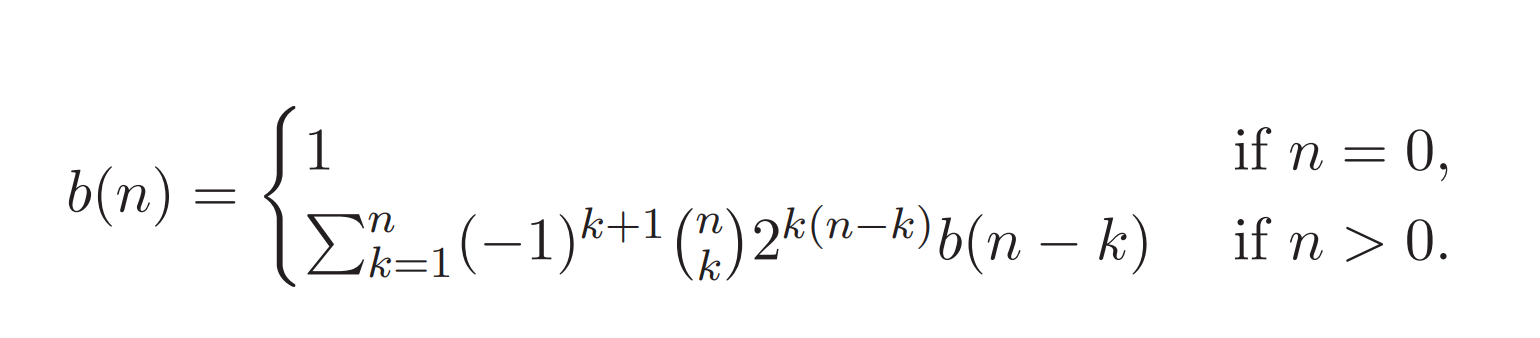

In [ ]:
display.Image("bay.png", width="500", height="500")

<h4> Zaimplementuj ten wz√≥r oraz sprawd≈∫ go dla 3 cech (przyklad wy≈ºej). Ile mo≈ºliwych sieci wystƒôpuje dla 10 cech?

In [46]:
import math as m

In [64]:
def no_topologies(n):
  if (n == 0):
    return 1
  else :
    b_n = 0
    for element in range (1,n+1):
      b_n += pow(-1,element + 1) * m.factorial(n) / (m.factorial(element) * m.factorial(n-element))  * pow(2, element * (n - element)) * no_topologies(n-element)
    return(b_n)

In [65]:
how_many = no_topologies(3)
print(how_many)

25.0


In [66]:
how_many = no_topologies(10)
print(how_many)

4.175098976430598e+18
